#05. Машинное обучение без учителя

## Генераторы данных

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

[3 4 2 3 7 0]


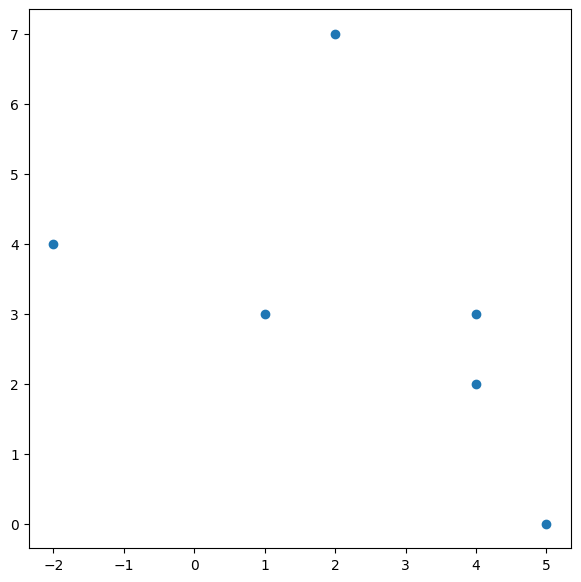

In [ ]:
X = np.array([[1,3], [-2,4], [4,2], [4,3], [2,7], [5,0]])
print(X[:,1])

plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1])
plt.show()

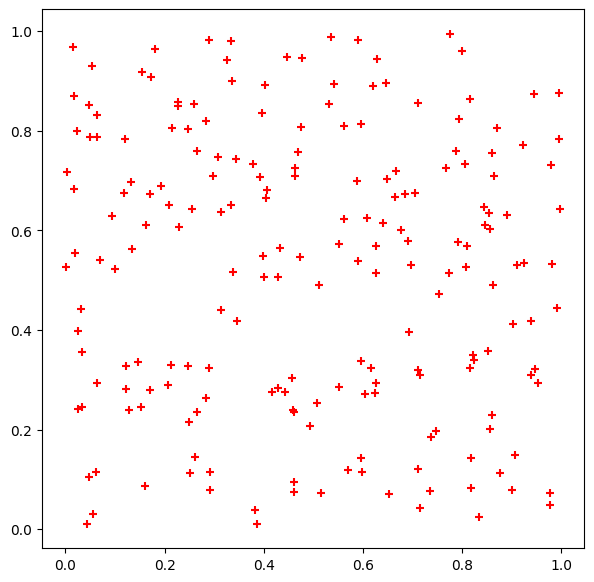

In [ ]:
X = np.random.rand(200,2)

plt.figure(figsize=(7,7))
plt.scatter(X[:,0],X[:,1],c='r',marker='+')
plt.show()

(array([[-5.41397842, -7.10588589],
       [-7.42400992, -6.769187  ],
       [ 3.62704772,  2.28741702],
       [-6.81209899, -8.30485778],
       [-2.26723535,  7.10100588],
       [-2.97867201,  9.55684617],
       [-0.92998481,  9.78172086],
       [ 2.914961  ,  1.41088215],
       [ 3.73185476,  0.56086598],
       [-2.97261532,  8.54855637]]), array([2, 2, 1, 2, 0, 0, 0, 1, 1, 0]))


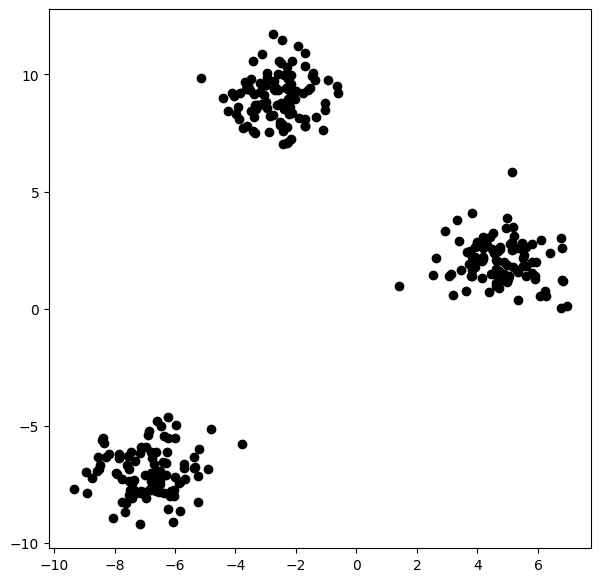

In [ ]:
from sklearn.datasets import make_blobs
print(make_blobs(n_samples=10, random_state=42))

X, _ = make_blobs(n_samples=300, random_state=42)

plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c="black")
plt.show()

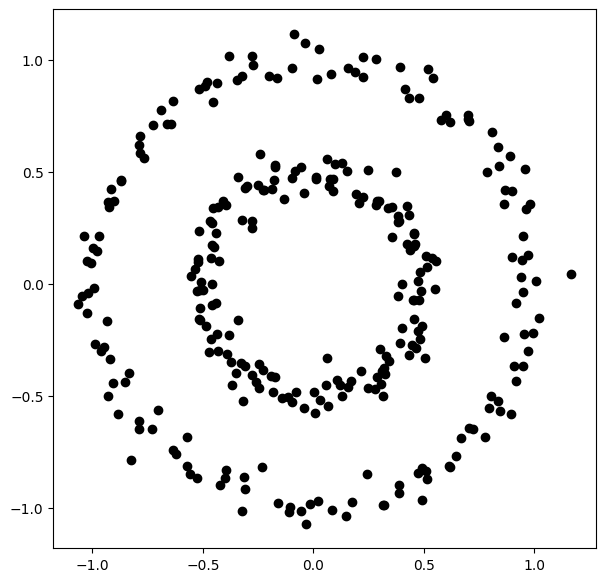

In [ ]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=.5, noise=.05)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c="black")
plt.show()

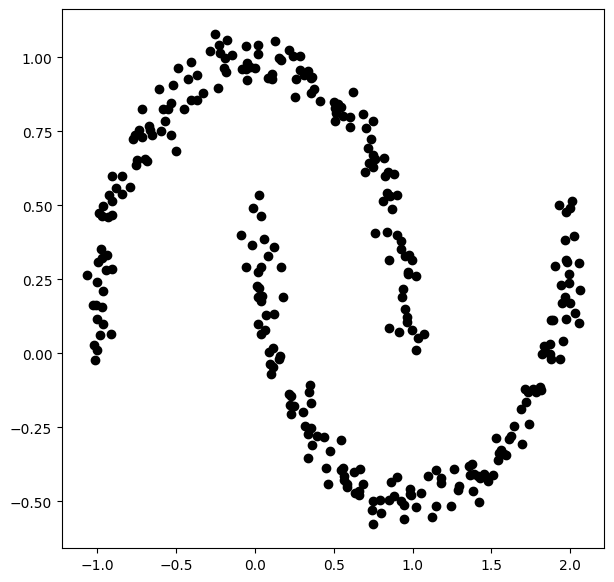

In [ ]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.05)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c="black")
plt.show()

<h3> Ирисы Фишера </h3>

Ирисы Фишера — это набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном. Этот набор данных стал уже классическим, и часто используется в литературе для иллюстрации работы различных статистических алгоритмов.

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

1. Длина наружной доли околоцветника (англ. sepal length);
2. Ширина наружной доли околоцветника (англ. sepal width);
3. Длина внутренней доли околоцветника (англ. petal length);
4. Ширина внутренней доли околоцветника (англ. petal width).

![maxresdefault[1].jpg](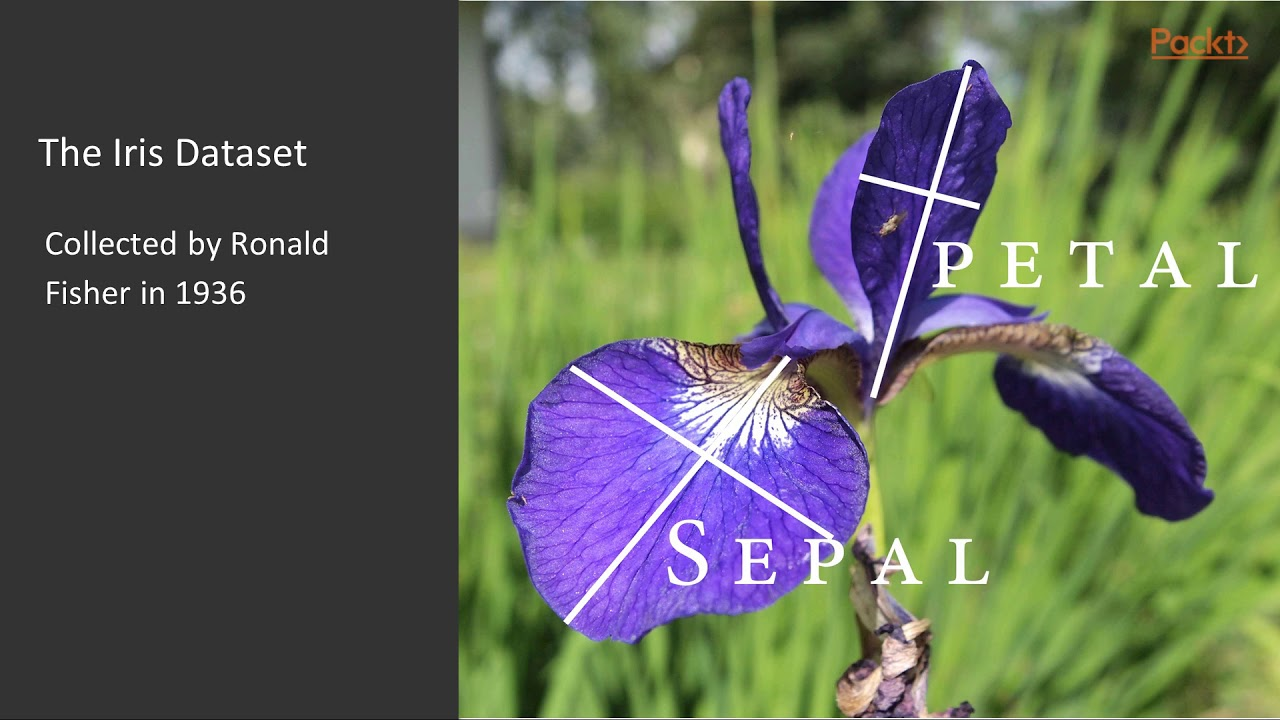)


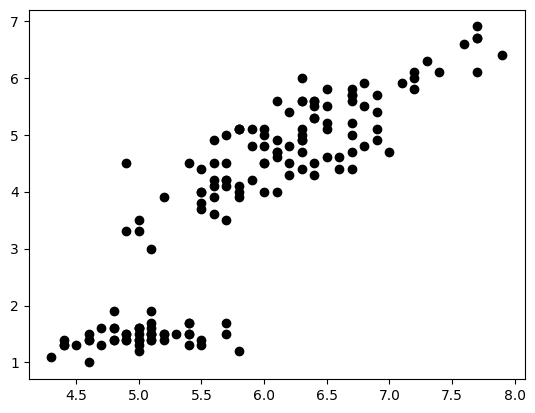

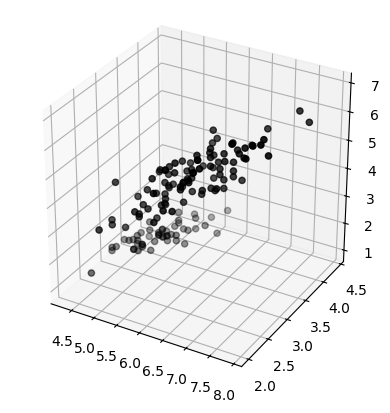

In [ ]:
from sklearn.datasets import load_iris
X = load_iris().data
#print(X)

fig = plt.figure()
plt.scatter(X[:,0], X[:,2], c="black")
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
ax.scatter(X[:,0], X[:,1], X[:,2], c="black")
plt.show()

(1797, 64)
[ 0.  0.  4.  9. 12. 16.  8.  0.  0.  0. 15. 15.  8.  8.  2.  0.  0.  4.
 16. 11.  4.  1.  0.  0.  0.  8. 16. 16. 16. 14.  0.  0.  0.  0. 11.  9.
  8. 16.  0.  0.  0.  0.  0.  0.  7. 16.  0.  0.  0.  0.  0.  8. 16. 12.
  0.  0.  0.  0.  3. 13.  9.  1.  0.  0.]
5


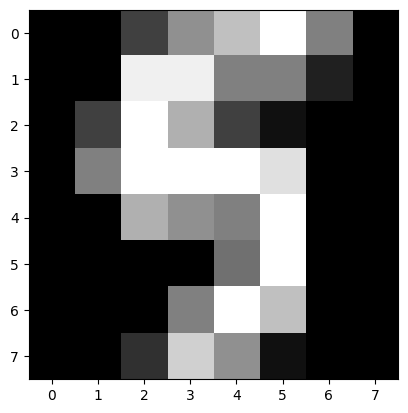

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
#print(digits)

X = digits.data
y = digits.target
print(X.shape)
print(X[1700])

#data = 255-data
print(y[1700])
plt.imshow(digits.images[1700], cmap=plt.cm.gray)
plt.show()

(400, 4096)
[0.75206614 0.7933884  0.8181818  ... 0.16528925 0.17355372 0.18181819]
7


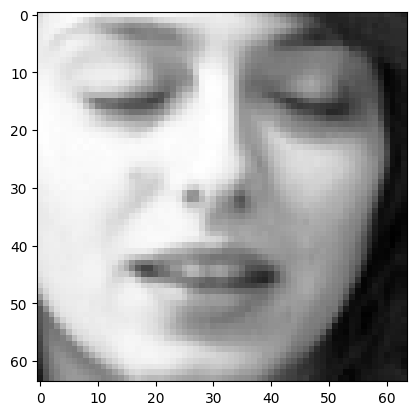

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces.data
y = faces.target
print(X.shape)
print(X[42])

#data = 255-data
print(y[42])
plt.imshow(faces.images[42], cmap=plt.cm.gray)
plt.show()

## Уменьшение размерности пространства признаков

### Метод главных компонент (PCA)

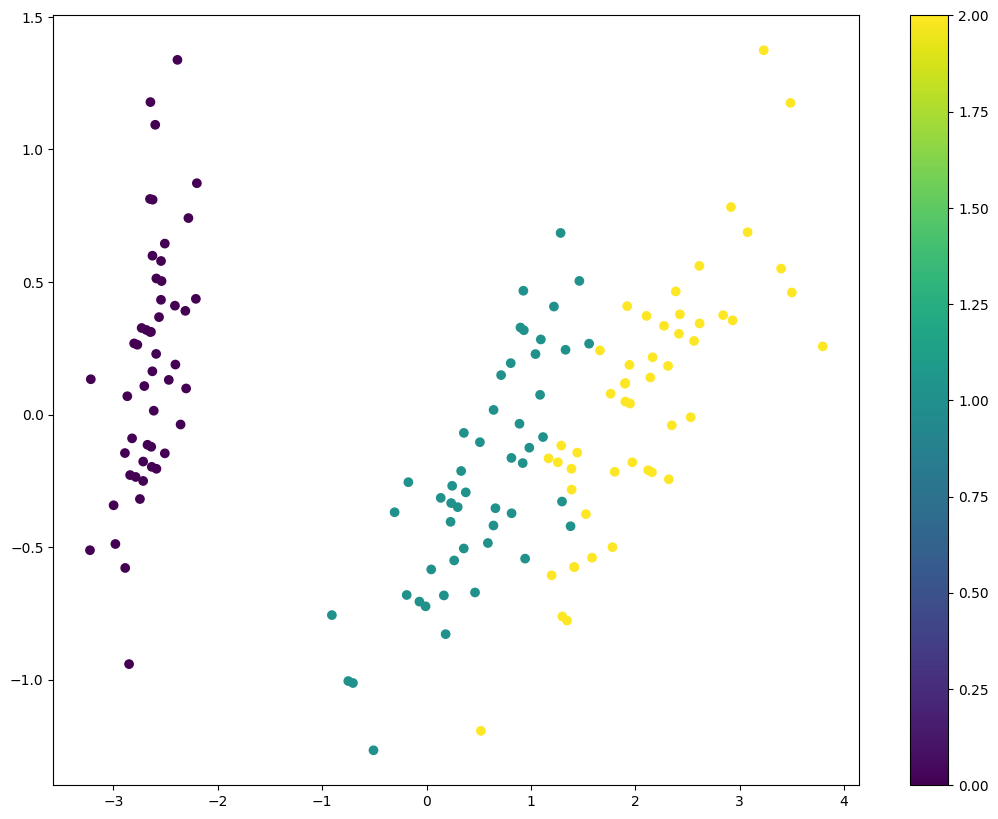

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
#print(iris)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(iris['data'])
y = iris['target']

plt.figure(figsize=(13, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar()
plt.show()

### Стохастическое вложение соседей с t-распределением (t-SNE)

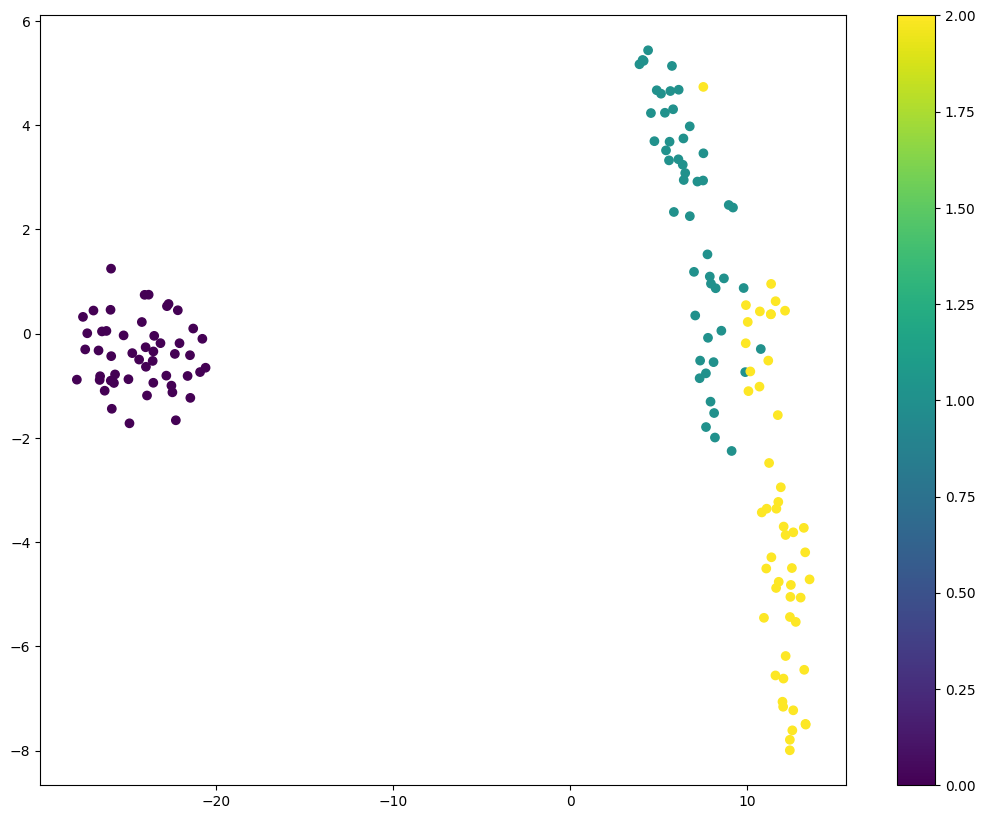

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X = tsne.fit_transform(iris['data'])
y = iris['target']

plt.figure(figsize = (13, 10))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.colorbar()
plt.show()

## Кластеризация

### Метод k-means

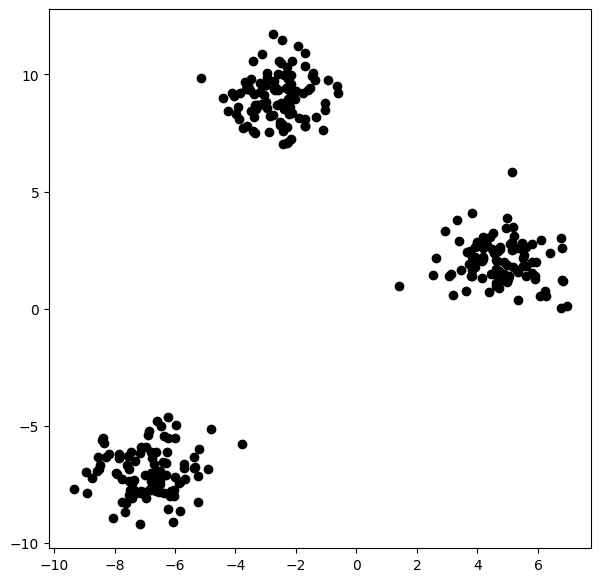

In [ ]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, random_state=42)

plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c="black")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

[1 1 2 0 1 0 2 0 2 2 2 0 2 2 1 2 1 0 2 2 2 2 0 1 2 1 1 0 0 2 2 2 1 2 1 2 1
 0 1 0 0 2 1 0 2 2 1 0 1 0 0 1 1 2 1 0 1 2 0 2 1 0 0 1 1 0 0 1 1 2 0 1 1 2
 2 1 1 0 2 0 2 2 1 2 0 1 1 2 0 2 1 2 1 2 2 1 1 2 1 1 0 2 0 2 2 2 2 2 0 1 0
 2 2 2 2 0 1 0 1 0 0 0 2 1 1 1 1 2 1 1 2 2 2 2 2 0 0 1 2 1 2 2 1 2 0 0 0 2
 0 2 2 1 0 1 2 0 0 1 1 2 2 1 1 1 2 1 0 2 2 2 2 2 0 2 0 0 0 2 0 0 1 2 1 0 0
 1 0 2 0 0 1 1 0 1 0 0 0 0 2 1 2 2 0 0 2 0 1 1 0 2 2 1 0 0 1 1 1 1 2 1 1 0
 1 1 2 0 1 1 0 2 2 1 2 1 0 0 1 0 1 1 1 0 0 2 1 0 0 0 1 0 1 0 1 0 0 1 0 2 1
 2 2 2 1 2 0 0 1 0 0 2 2 0 0 0 1 1 1 2 2 2 0 0 0 0 1 0 1 0 0 1 2 0 0 2 1 2
 0 2 1 1]
[[ 4.74710337  2.01059427]
 [-6.88387179 -6.98398415]
 [-2.63323268  9.04356978]]


In [ ]:
color_list = np.array(['red','green','yellow','magenta','blue','cyan','grey'])
print(color_list[[3,0,3,1,4,3,1]])

['magenta' 'red' 'magenta' 'green' 'blue' 'magenta' 'green']


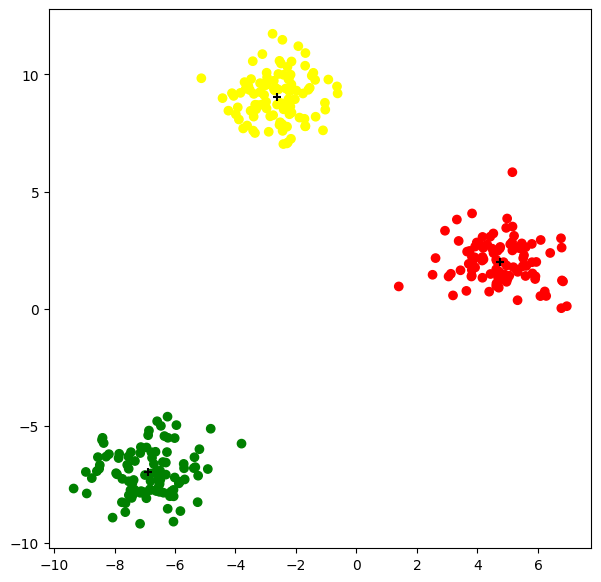

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=color_list[labels])
plt.scatter(centroids[:,0],centroids[:,1], c='black', marker='+')
plt.show()

In [ ]:
kmeans.predict([[-6,10], [6,-5]])

array([2, 0], dtype=int32)

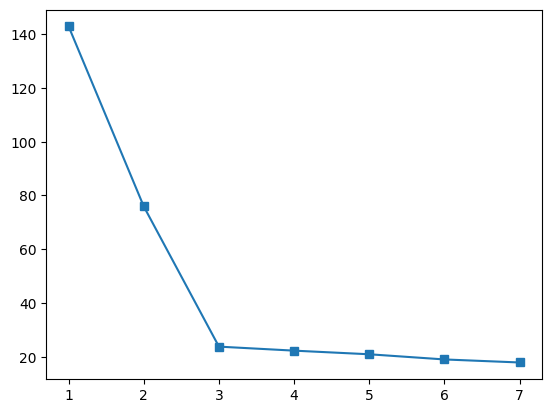

In [ ]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1,8), inertia, marker='s')
plt.show()

### Метод DBSCAN

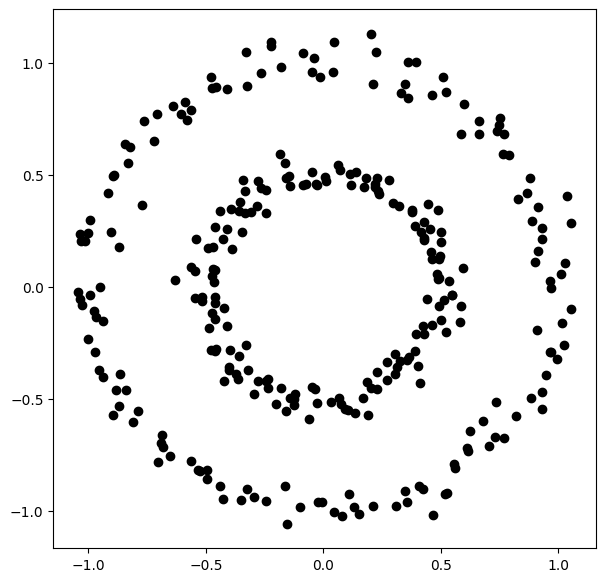

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


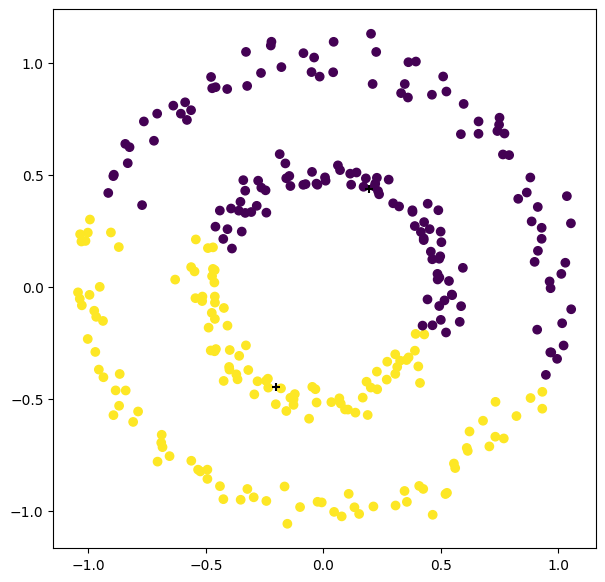

In [ ]:
from sklearn.datasets import make_circles
X, _ = make_circles(n_samples=300, factor=.5, noise=.05)

plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c="black")
plt.show()


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit_transform(X)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',marker='+')
plt.show()

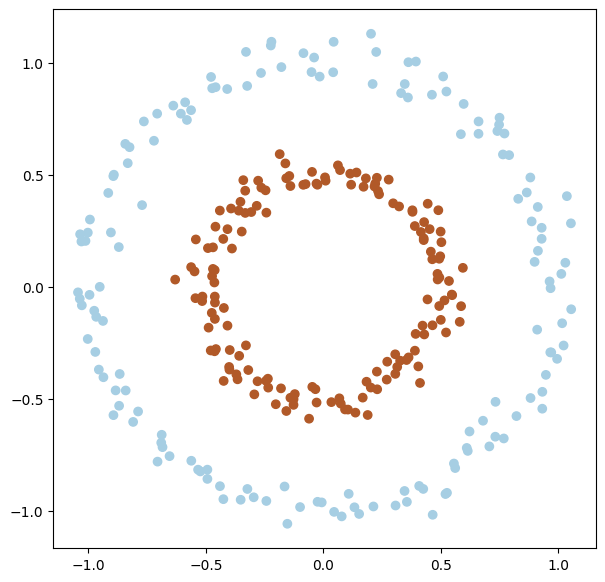

In [ ]:
from sklearn.cluster import DBSCAN
labels = DBSCAN(eps=.2, min_samples=2).fit_predict(X)

import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=labels, cmap=plt.cm.Paired)
plt.show()

### Сжатие цветового пространства изображений

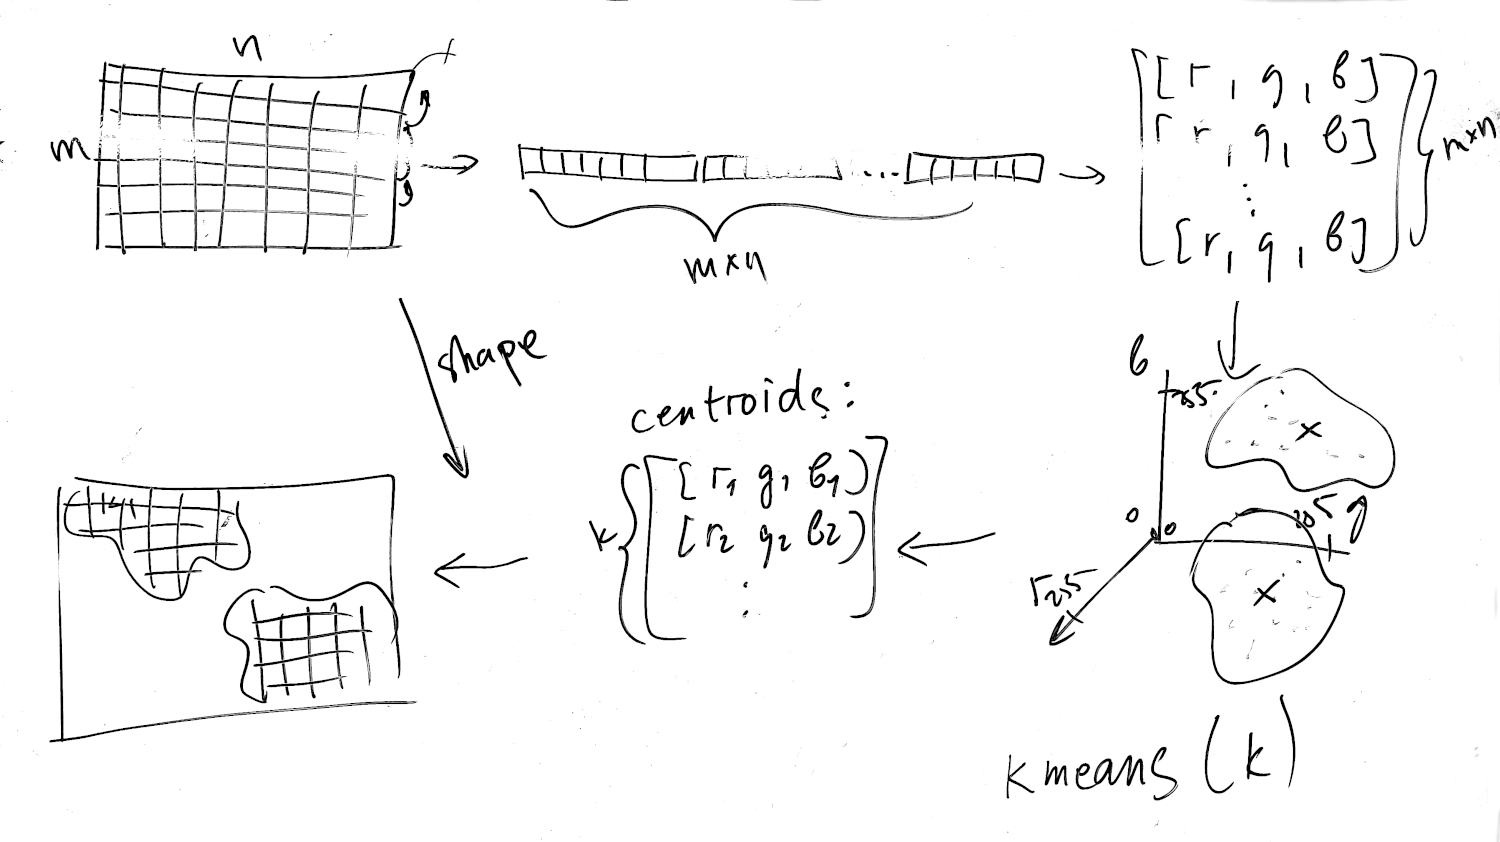

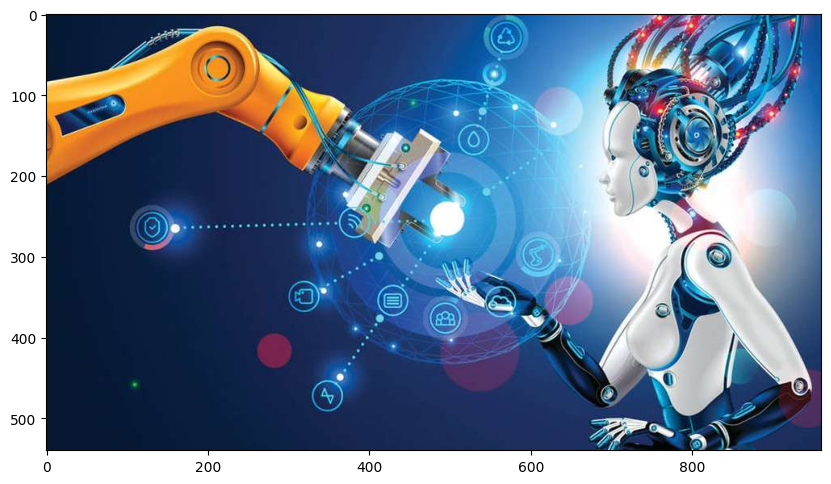

(540, 960, 3)
[[[  5  25  50]
  [  5  25  50]
  [  5  25  50]
  ...
  [ 26  74 150]
  [ 26  74 150]
  [ 26  74 150]]

 [[  5  25  50]
  [  5  25  50]
  [  5  25  50]
  ...
  [ 26  74 150]
  [ 26  74 150]
  [ 26  74 150]]

 [[  5  25  50]
  [  5  25  50]
  [  5  25  50]
  ...
  [ 25  74 150]
  [ 26  74 150]
  [ 26  74 150]]

 ...

 [[  8  24  50]
  [  8  24  50]
  [  8  24  50]
  ...
  [ 27  44  88]
  [ 27  44  88]
  [ 27  44  88]]

 [[  8  24  50]
  [  8  24  50]
  [  8  24  50]
  ...
  [ 27  44  88]
  [ 27  44  88]
  [ 27  44  88]]

 [[  8  24  50]
  [  8  24  50]
  [  8  24  50]
  ...
  [ 27  44  88]
  [ 27  44  88]
  [ 27  44  88]]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#from matplotlib.image import imread
from skimage.io import imread

url = 'https://d3rds0a9qm8vc5.cloudfront.net/s3-grok-cloodon-com/Artificial_intelligence_transforming_robotics.1663343276077.jpg'
orig_img = imread(url)

fig = plt.figure(figsize=(10,8))
plt.imshow(orig_img)
plt.show()

print(orig_img.shape)
print(orig_img)

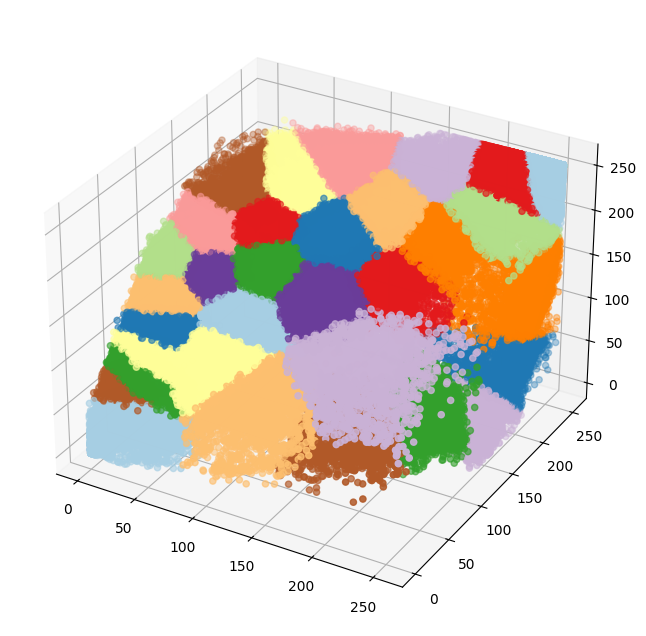

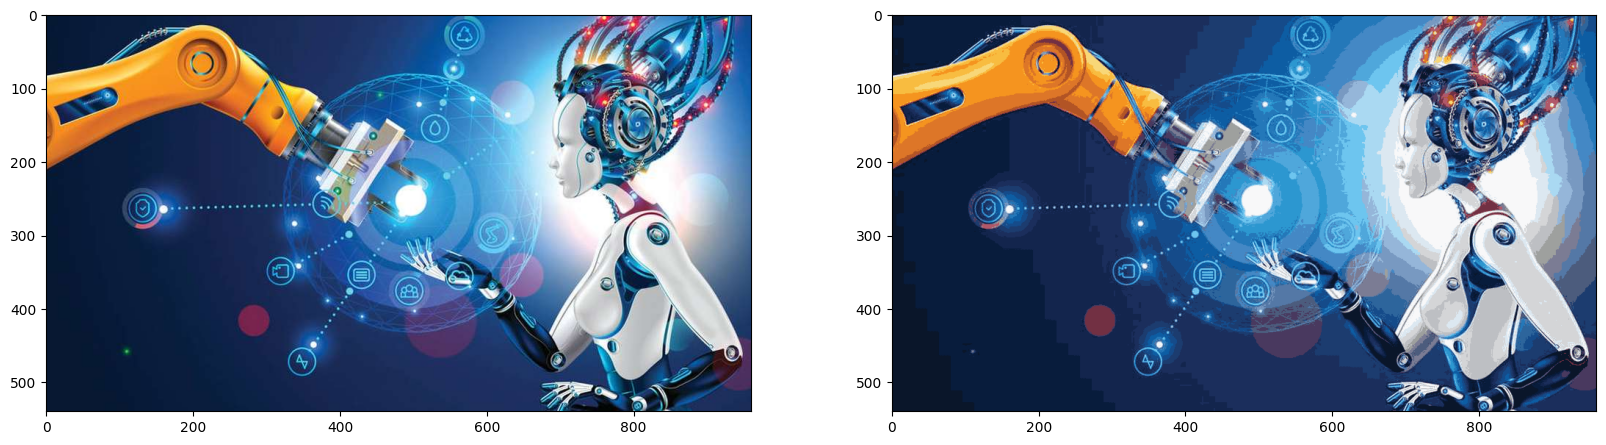

In [ ]:
n_colors = 32

from sklearn.cluster import KMeans
X = orig_img.reshape((-1,orig_img.shape[-1]))
kmeans = KMeans(n_clusters=n_colors).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
#new_img = centroids[labels].reshape(orig_img.shape)  # for png
new_img = centroids[labels].astype(int).reshape(orig_img.shape)  # for jpg

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=labels,cmap=plt.cm.Paired)
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.imshow(orig_img)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()

# Домашние задания

1) Генерация данных

1. сгенерировать 500 точек с помощью метода make_blobs;
2. сгенерировать 450 точек с помощью метода make_circles, умножить координаты точек на 10;
3. отобразить на одном рисунке первые 500 точек красным цветом, а вторые 450  - зеленым.

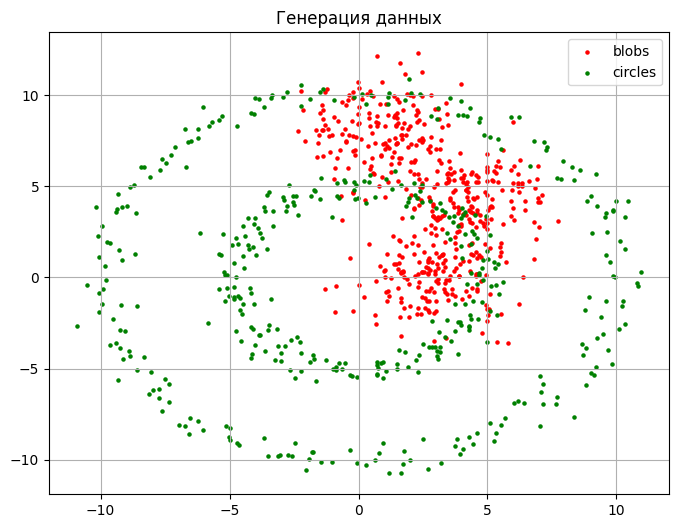

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles

x_blobs, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.5, random_state=88)

x_circles, _ = make_circles(n_samples=450, factor=0.5, noise=0.05, random_state=88)
x_circles *= 10

plt.figure(figsize=(8, 6))
plt.scatter(x_blobs[:, 0], x_blobs[:, 1], color='red', label='blobs', s=5)
plt.scatter(x_circles[:, 0], x_circles[:, 1], color='green', label='circles', s=5)
plt.title("Генерация данных")
plt.legend()
plt.grid(True)
plt.show()

2) Уменьшение размерности данных

1. Вывести результат работы алгоритма PCA для датасета digits.
2. Вывести результат работы алгоритма t-SNE для датасета digits.

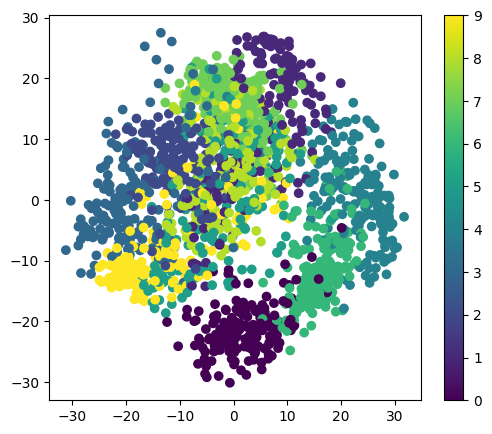

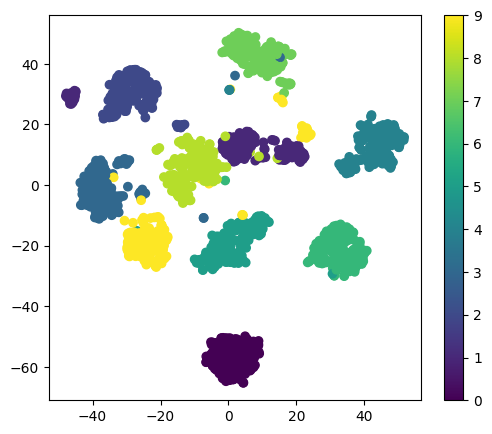

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


digits = load_digits()


pca = PCA(n_components=2)
X = pca.fit_transform(digits['data'])
y = digits['target']

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar()
plt.show()

tsne = TSNE(n_components=2)
X = tsne.fit_transform(digits['data'])
y = digits['target']

plt.figure(figsize = (6, 5))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.colorbar()
plt.show()

3) Суперпиксельная сегментация изображения

Дано:
- изображение (формат jpg/png)
- количество кластеров N (>50)
- задан нормировочный коэффициент k

Требуется:
- каждый пиксель представить в виде объекта с набором признаков $\{R, G, B, k*X, k*Y\}$ (где R – количество красного цвета, G – зеленого, B – синего, X - номер столбца, Y - номер строки)
- провести кластеризацию пикселей методом kmeans
- заменить в исходном изображении цвет каждого пикселя на цвет центра кластера, которому принадлежит пиксель
- повторить кластеризацию для разных значений коэффициента k

Пример:

Displaying segmented image for k=0.1


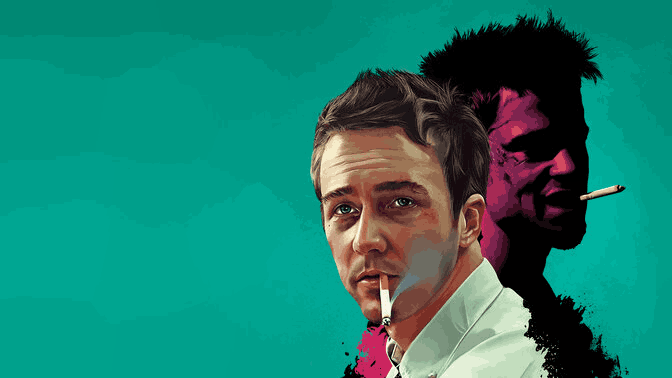



Displaying segmented image for k=1


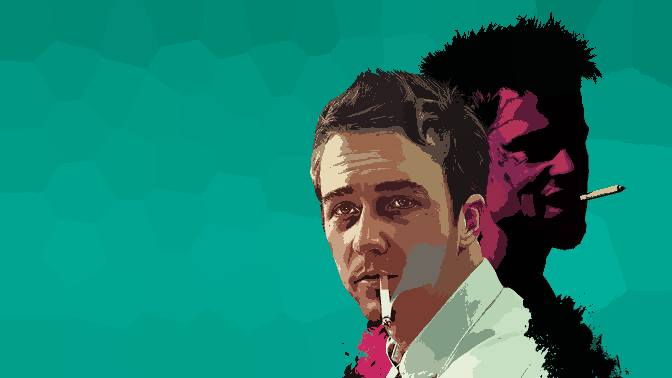



Displaying segmented image for k=5


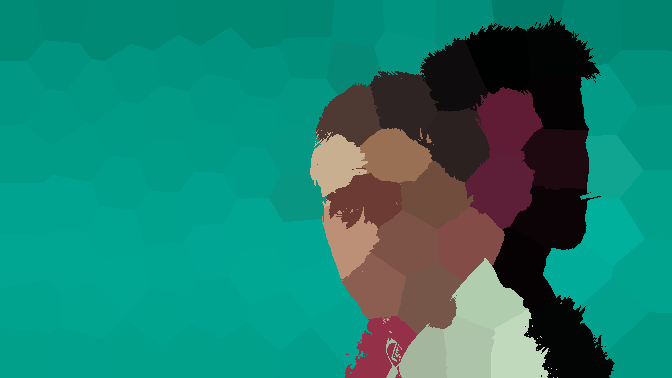



Displaying segmented image for k=8


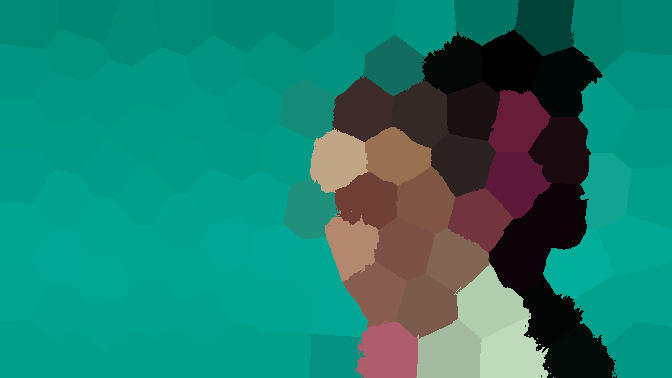

In [ ]:
import cv2
import numpy as np
import requests
from io import BytesIO
from PIL import Image
from google.colab.patches import cv2_imshow

def superpixel_segmentation(image_url, n_clusters=100, k_values = [0.1]):
    response = requests.get(image_url)
    if response.status_code != 200:
        raise ValueError("Failed to download image. Check the URL.")
    image = np.array(Image.open(BytesIO(response.content)))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    h, w, c = image.shape
    X, Y = np.meshgrid(np.arange(w), np.arange(h))
    features = np.float32(np.dstack((image, X, Y)).reshape(-1, c + 2))
    for k in k_values:
        Z = features.copy()
        Z[:, -2:] *= k
        _, labels, centers = cv2.kmeans(Z, n_clusters, None,
                                         criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0),
                                         attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)
        segmented_image = centers[labels.flatten()][:, :c].reshape((h, w, c)).astype(np.uint8)
        print(f"Displaying segmented image for k={k}")
        cv2_imshow(segmented_image)
        print("\n")

image_url = 'https://avatars.mds.yandex.net/get-ott/223007/2a00000161e3ab2e1b618245facdbff000ea/672x378'
superpixel_segmentation(image_url, n_clusters=100, k_values=[0.1, 1, 5, 8])

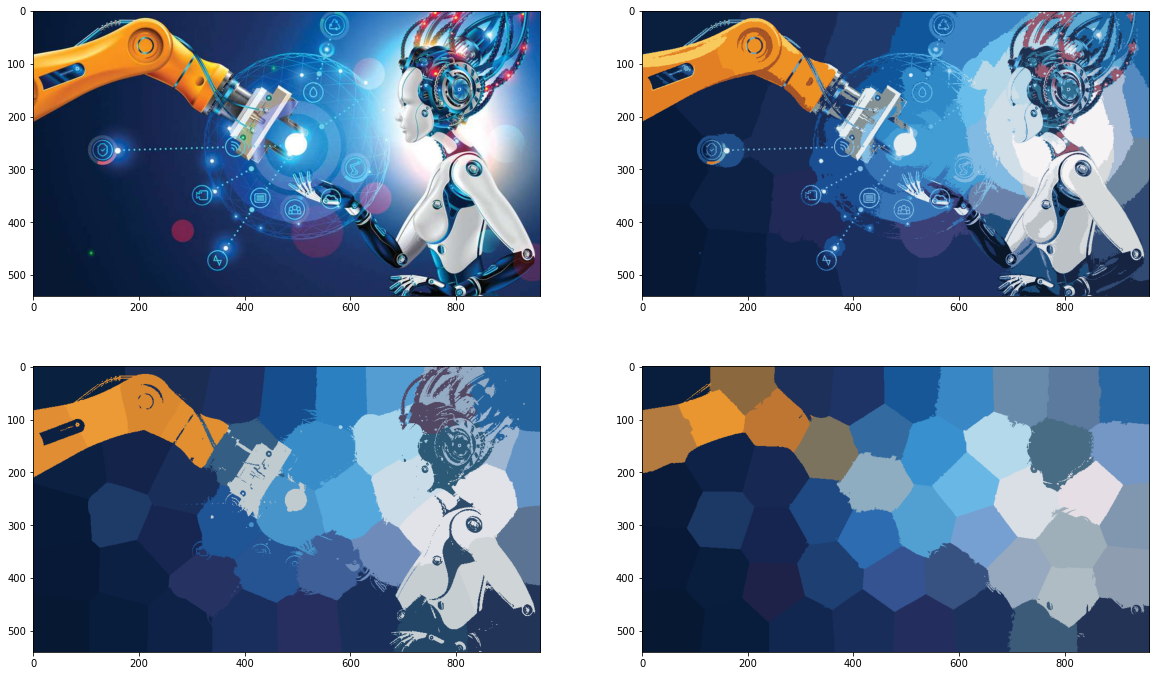